<a href="https://colab.research.google.com/github/Henriquerezer/FLAI-Cursos/blob/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Aula_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MÁQUINA DE VETOR DE SUPORTE**

In [1]:
# bibliotecas padrão 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#para mais tarde
# importação dos dados do meu Github
data = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/FLAI-Cursos/main/Rafinha_dos_dados_cursos/Classifica%C3%A7%C3%A3o/Dados/svm.csv')
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0,1
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0,1


# **Separação de variaveis preditivas e alvo**

In [2]:
X = data.drop('Exited', axis = 1)
y = data['Exited']

In [3]:
y.mean()
#20% da minha base é de classe 1 -> clientes que saíram da empresa
#Dados desbalanceados(Tomar cuidado)

0.2037

# **Separando em conjunto de treino e teste**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42, stratify = y )

In [13]:
#Escala das variaveis 

X_train['CreditScore'].min(), X_train['CreditScore'].max()

(350, 850)

In [14]:
X_train['Age'].min(), X_train['Age'].max()

(18, 92)

In [15]:
X_train['Balance'].min(), X_train['Balance'].max()

(0.0, 221532.8)

In [5]:
# Tenho valores de mínimo e máximo diferentes
#Em especial no SVM, preciso que todas as variaveis estajam escaladas 
#Estejam dentro do mesmo intervalo de mínimo e máximo (média e desvio padrão parecidos)


from sklearn.preprocessing import RobustScaler

rs = RobustScaler(quantile_range=(5.,95.))
X_train2 = rs.fit_transform(X_train)
X_test2  = rs.transform(X_test)

#Sempre nos dados de treino
# * PASSO O FIT_TRANSFORM()

#Sempre nos dados de teste
# *PASSO APENAS TRANSFORM() -> Pq não devo ajustar os dados de teste, caso isso aconteça, meu modelo irá aprender com esses dados

In [18]:
#Sempre retornará uma matriz numpy
X_train2

#Transformando para pandas dataframe
pd.DataFrame(X_train2, columns=X_train.columns)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.176471,-0.485714,-0.125,-0.006254,0.0,0.0,-1.0,0.438445,1.0,0.0,0.0,0.0,0.0
1,0.114551,0.742857,-0.500,-0.596042,1.0,0.0,0.0,0.487196,0.0,0.0,1.0,1.0,-1.0
2,0.501548,-0.171429,-0.500,0.135549,0.0,0.0,-1.0,0.016610,1.0,0.0,0.0,0.0,0.0
3,0.216718,-0.485714,0.125,-0.596042,1.0,0.0,-1.0,0.536906,1.0,0.0,0.0,0.0,0.0
4,0.266254,-0.542857,-0.125,-0.596042,1.0,0.0,0.0,-0.282451,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.086687,-0.057143,-0.625,0.513634,1.0,0.0,-1.0,0.359936,0.0,1.0,0.0,1.0,-1.0
6996,0.185759,1.057143,0.000,-0.596042,1.0,-1.0,-1.0,0.292462,0.0,0.0,1.0,0.0,0.0
6997,0.046440,0.000000,0.500,-0.154230,1.0,0.0,0.0,-0.171850,1.0,0.0,0.0,1.0,-1.0
6998,0.108359,-0.057143,0.375,0.025491,1.0,0.0,-1.0,-0.424211,0.0,0.0,1.0,0.0,0.0


# **Modelo de SVC, utilizando GridSearchCV**

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'C' : np.logspace(-7,7,10,base=2), #indicado procurar o parâmetro C em escala log
    'class_weight' : [None, 'balanced'],

}

svc = SVC(kernel='linear', probability=True, random_state = 42)

grid = GridSearchCV(svc, params, cv = 3, scoring = 'roc_auc', verbose = 10)

grid.fit(X_train2, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV 1/3; 1/20] START C=0.0078125, class_weight=None.............................
[CV 1/3; 1/20] END C=0.0078125, class_weight=None;, score=0.578 total time=   2.0s
[CV 2/3; 1/20] START C=0.0078125, class_weight=None.............................
[CV 2/3; 1/20] END C=0.0078125, class_weight=None;, score=0.562 total time=   1.9s
[CV 3/3; 1/20] START C=0.0078125, class_weight=None.............................
[CV 3/3; 1/20] END C=0.0078125, class_weight=None;, score=0.479 total time=   1.9s
[CV 1/3; 2/20] START C=0.0078125, class_weight=balanced.........................
[CV 1/3; 2/20] END C=0.0078125, class_weight=balanced;, score=0.740 total time=   4.6s
[CV 2/3; 2/20] START C=0.0078125, class_weight=balanced.........................
[CV 2/3; 2/20] END C=0.0078125, class_weight=balanced;, score=0.764 total time=   4.7s
[CV 3/3; 2/20] START C=0.0078125, class_weight=balanced.........................
[CV 3/3; 2/20] END C=0.0078125

GridSearchCV(cv=3,
             estimator=SVC(kernel='linear', probability=True, random_state=42),
             param_grid={'C': array([7.81250000e-03, 2.29646014e-02, 6.75037337e-02, 1.98425131e-01,
       5.83264520e-01, 1.71448797e+00, 5.03968420e+00, 1.48139954e+01,
       4.35452800e+01, 1.28000000e+02]),
                         'class_weight': [None, 'balanced']},
             scoring='roc_auc', verbose=10)

In [7]:
grid.best_params_

{'C': 5.0396841995794945, 'class_weight': 'balanced'}

# **Métricas**

0.7936885438510796


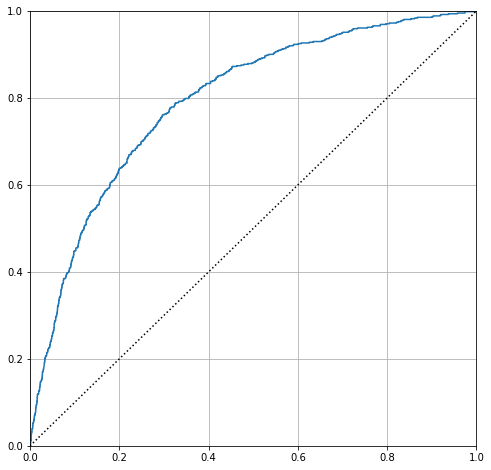

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

print(roc_auc_score(y_test, grid.predict_proba(X_test2)[:,1]))
fpr, tpr, tns = roc_curve(y_test, grid.predict_proba(X_test2)[:,1])
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot((0,1),(0,1), 'k:')
plt.grid();

In [9]:
pred = grid.predict_proba(X_test2)[:,1]
pred

array([0.06247718, 0.14232173, 0.20902671, ..., 0.35746884, 0.21928011,
       0.05159945])

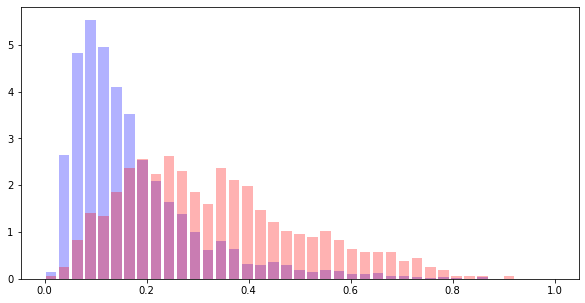

In [10]:
plt.figure(figsize=(10,5))
plt.hist(pred[y_test==0], color = 'blue', density = True, alpha = 0.3, rwidth = 0.8, bins = np.linspace(0,1,40))
plt.hist(pred[y_test==1], color = 'red', density = True, alpha = 0.3, rwidth = 0.8, bins = np.linspace(0,1,40));